watch synapstic distribution in paper and in our model

In [1]:
import os.path as path
import numpy as np
from scipy import stats
import pickle
from matplotlib import pyplot as plt
from eworm.utils import func
from eworm.network.detailed_circuit import *
from eworm.network.transform import *

--No graphics will be displayed.
/home/zhaomengdi/anaconda3/envs/eworm/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1. This is the synaptic distance in Rotem et al., biorxiv(2021)

connections/syn_gj_dist.xlsx


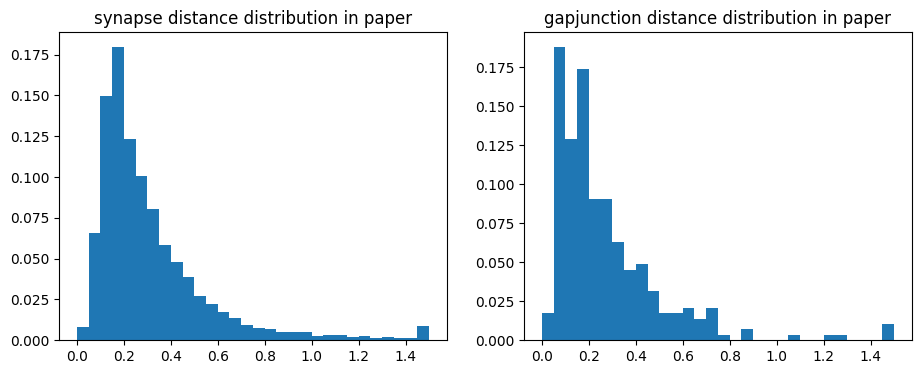

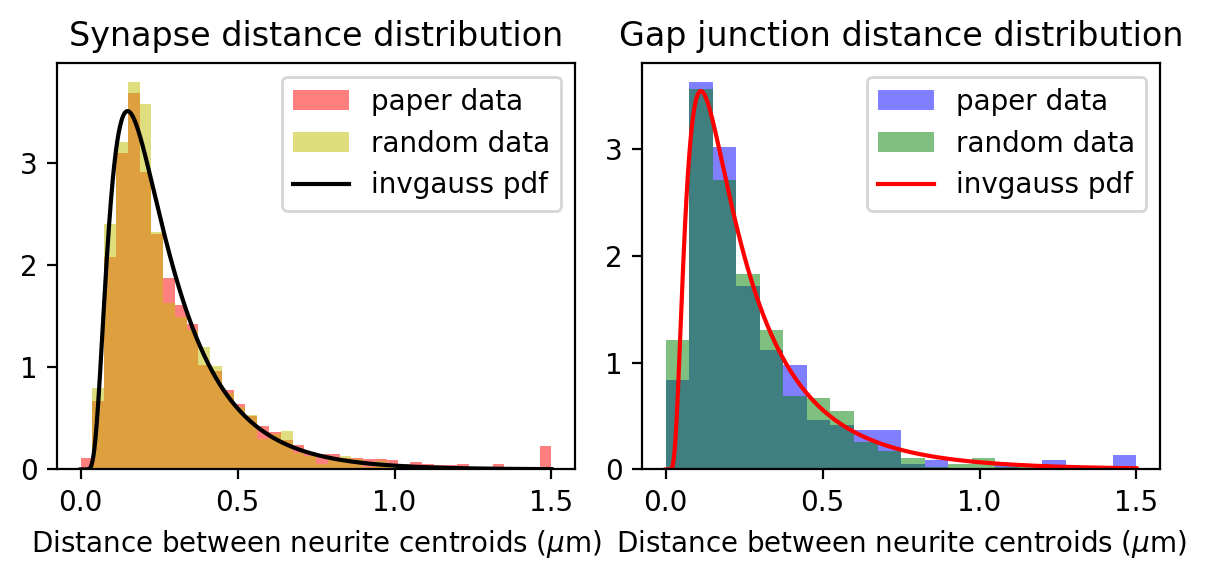

In [9]:
dist_file = path.join("connections", "syn_gj_dist.xlsx")
print(dist_file)
syn_dist, snrow, _ = func.read_excel(file_name=dist_file,
                            sheet_name="chemical")
gj_dist, gjnrow, _ = func.read_excel(file_name=dist_file,
                           sheet_name="gapjunction")
syn_dist = [syn_dist.cell_value(int(x), int(0)) for x in range(snrow)]
gj_dist = [gj_dist.cell_value(int(x), int(0)) for x in range(gjnrow)]
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
counts_s, bins_s = np.histogram(syn_dist, bins=np.linspace(0, 1.5, 31))
plt.hist(bins_s[:-1], bins_s, weights=counts_s/sum(counts_s))
plt.title("synapse distance distribution in paper")
plt.subplot(1,2,2)
counts_g, bins_g = np.histogram(gj_dist, bins=np.linspace(0, 1.5, 31))
plt.hist(bins_g[:-1], bins_g, weights=counts_g/sum(counts_g))
plt.title("gapjunction distance distribution in paper")
plt.savefig(path.join("connections", "Rotem_hist_in_paper.png"))


# histogram that use different bin and is fitted by a function
plt.figure(figsize=(6,3), dpi=200)
counts_s, bins_s = np.histogram(syn_dist, bins=np.linspace(0, 1.5, 41))
counts_g, bins_g = np.histogram(gj_dist, bins=np.linspace(0, 1.5, 21))
# distribution of synapse distance
plt.subplot(1,2,1)
plt.title("Synapse distance distribution")
plt.hist(syn_dist, bins_s, density=True, color='r', alpha=0.5, label="paper data")
# distribution fitting of synapse distance
bin_centers = np.linspace(0,1.5,1000)
SYN_MU = 0.44
SYN_SCALE = 0.63
x_random = stats.invgauss.rvs(mu=SYN_MU, loc=0, scale=SYN_SCALE, size=1000)
plt.hist(x_random, bins_s, density=True, alpha=0.5, color='y', label="random data")
pdf = stats.invgauss.pdf(x = bin_centers, mu=SYN_MU, loc=0, scale=SYN_SCALE)
plt.plot(bin_centers, pdf, label="invgauss pdf", color='k')
plt.xlabel(r"Distance between neurite centroids (${\mu}$m)")
plt.legend()
plt.tight_layout()

# distribution of gap junction distance
plt.subplot(1,2,2)
plt.title("Gap junction distance distribution")
plt.hist(gj_dist, bins_g, density=True, alpha=0.5, color='b', label="paper data")
# distribution fitting of gap junction distance
GJ_MU = 0.7
GJ_SCALE = 0.4
x_random = stats.invgauss.rvs(mu=GJ_MU, loc=0, scale=GJ_SCALE, size=1000)
plt.hist(x_random, bins_g, density=True, alpha=0.5, color='g', label="random data")
pdf = stats.invgauss.pdf(x = bin_centers, mu=GJ_MU, loc=0, scale=GJ_SCALE)
plt.plot(bin_centers, pdf, label="invgauss pdf", color='red')
plt.xlabel(r"Distance between neurite centroids (${\mu}$m)")
plt.legend()
plt.tight_layout()
plt.savefig(path.join(path.dirname("__file__"), "connections", "Rotem_hist_distribution_fit.png"))

2. This is the synaptic distance distribution in our network.

Mechanisms already loaded from path: /home/zhaomengdi/Project/model_meta_worm/eworm/network/../components/mechanism/.  Aborting.
syn number: (4930,), gj number:(1708,)


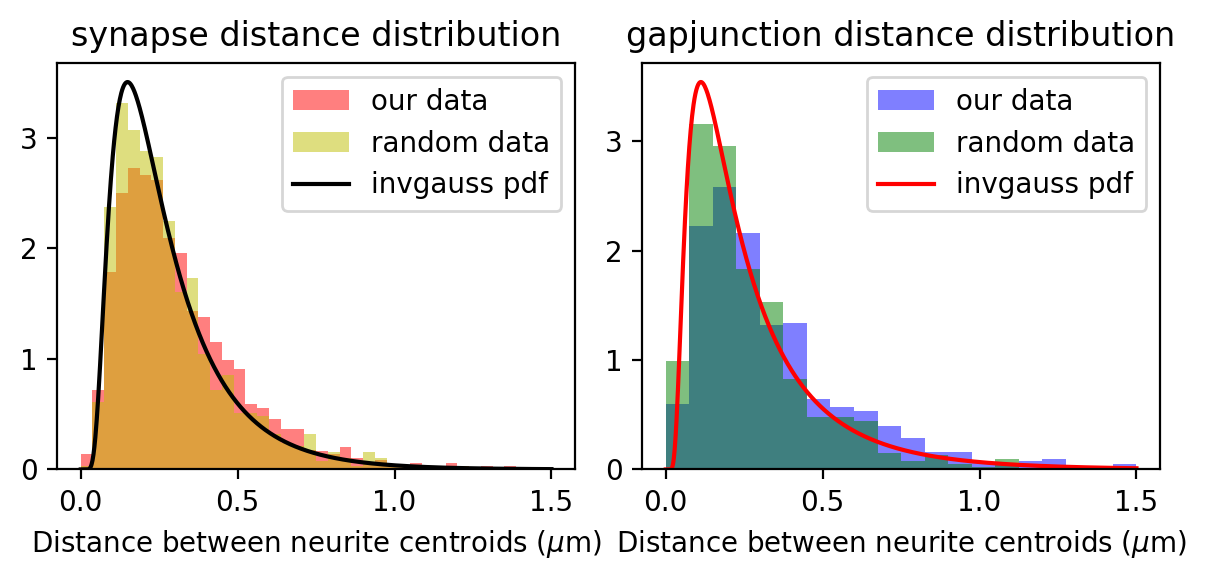

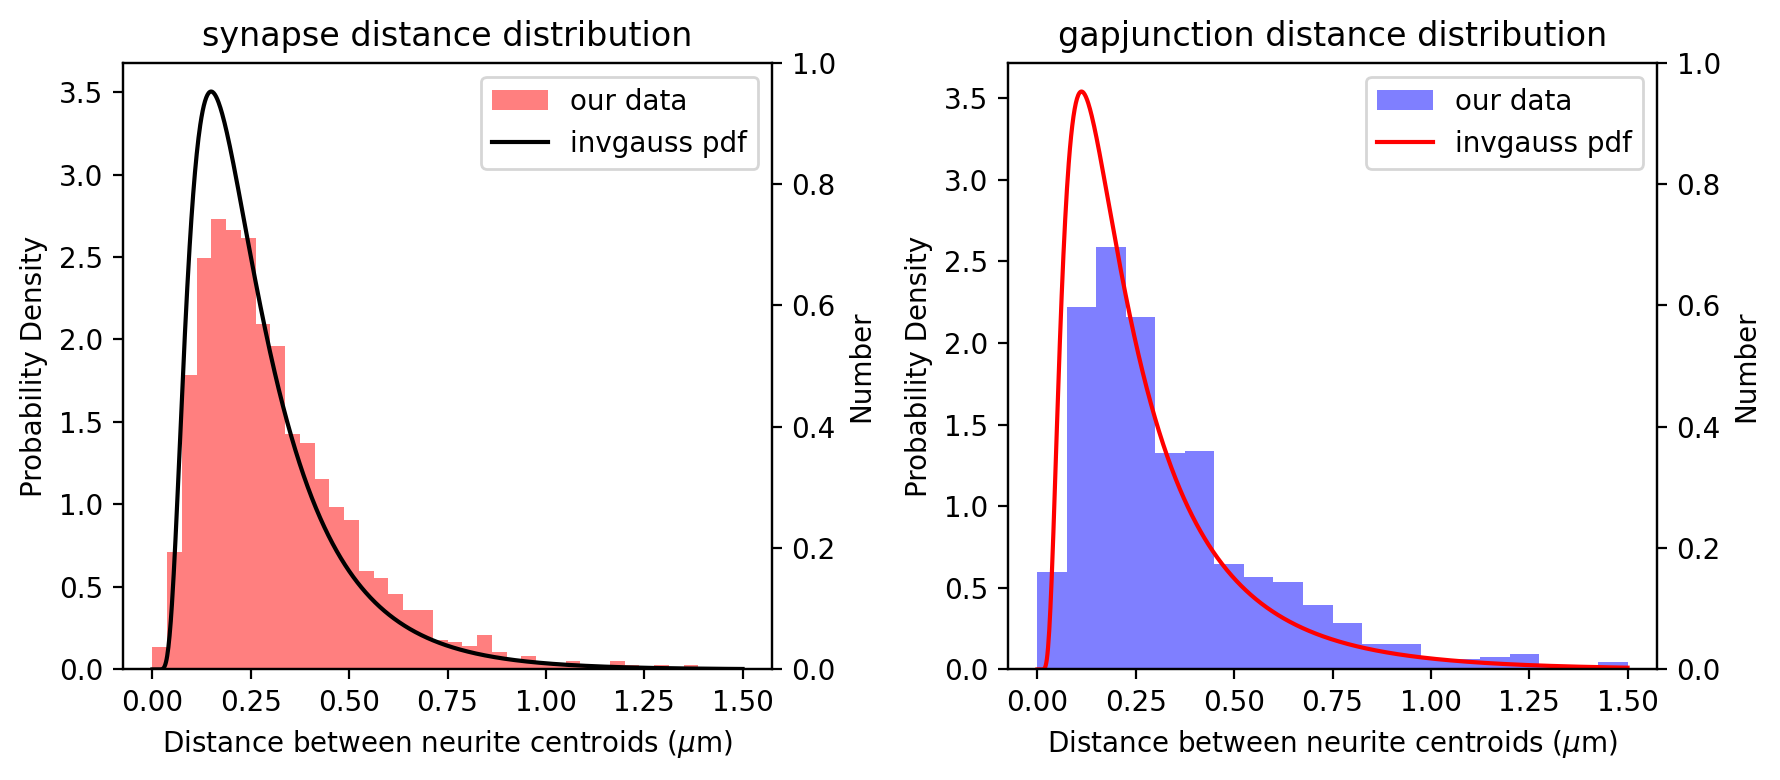

In [12]:
config_dir = path.join("..", "network", "config.json")
config = func.load_json(config_dir)
abs_circuit_path = path.join("..", "network", "output", "test")
abs_circuit_file = path.join(abs_circuit_path, "test_abs_circuit.pkl")

if path.exists(abs_circuit_file):
    abs_circuit = pickle.load(open(abs_circuit_file, 'rb'))
    circuit = abstract2detailed(abs_circuit, config, load_hoc=True, rec_voltage=True)
syn_dist = []
gj_dist = []
for conn in circuit.connections:
    if not conn.pre_segment:
        continue
    point1_loc = conn.pre_segment.location
    point2_loc = conn.post_segment.location
    dist = np.linalg.norm(point1_loc - point2_loc)
    if conn.category == 'gj':
        gj_dist.append(dist)
    elif conn.category == 'syn':
        syn_dist.append(dist)
syn_dist = np.array(syn_dist)
gj_dist = np.array(gj_dist)
print(f"syn number: {syn_dist.shape}, gj number:{gj_dist.shape}")


plt.figure(figsize=(6,3), dpi=200)
counts_s, bins_s = np.histogram(syn_dist, bins=np.linspace(0, 1.5, 41)) # dist that <0 == 0
counts_g, bins_g = np.histogram(gj_dist, bins=np.linspace(0, 1.5, 21))
# distribution of synapse distance
plt.subplot(1,2,1)
plt.title("synapse distance distribution")
plt.hist(syn_dist, bins_s, density=True, color='r', alpha=0.5, label="our data")
# distribution fitting of synapse distance
bin_centers = np.linspace(0,1.5,1000)
SYN_MU = 0.44
SYN_SCALE = 0.63
x_random = stats.invgauss.rvs(mu=SYN_MU, loc=0, scale=SYN_SCALE, size=1000)
plt.hist(x_random, bins_s, density=True, alpha=0.5, color='y', label="random data")
pdf = stats.invgauss.pdf(x = bin_centers, mu=SYN_MU, loc=0, scale=SYN_SCALE)
plt.plot(bin_centers, pdf, label="invgauss pdf", color='k')
plt.xlabel(r"Distance between neurite centroids (${\mu}$m)")
plt.tight_layout()
plt.legend()

# distribution of gap junction distance
plt.subplot(1,2,2)
plt.title("gapjunction distance distribution")
plt.hist(gj_dist, bins_g, density=True, alpha=0.5, color='b', label="our data")
GJ_MU = 0.7
GJ_SCALE = 0.4
x_random = stats.invgauss.rvs(mu=GJ_MU, loc=0, scale=GJ_SCALE, size=1000)
plt.hist(x_random, bins_g, density=True, alpha=0.5, color='g', label="random data")
pdf = stats.invgauss.pdf(x = bin_centers, mu=GJ_MU, loc=0, scale=GJ_SCALE)
plt.plot(bin_centers, pdf, label="invgauss pdf", color='red')
plt.xlabel(r"Distance between neurite centroids (${\mu}$m)")
plt.legend()
plt.tight_layout()
plt.savefig(path.join(path.dirname("__file__"), "connections", "ours_hist_distribution_fit.png"))

fig = plt.figure(figsize=(9,4), dpi=200)
# distribution of synapse distance
ax = fig.add_subplot(1,2,1)
ax.set_title("synapse distance distribution")
h1 = ax.hist(syn_dist, bins_s, density=True, color='r', alpha=0.5, label="our data")
# distribution fitting of synapse distance
pdf = stats.invgauss.pdf(x = bin_centers, mu=SYN_MU, loc=0, scale=SYN_SCALE)
h1 = plt.plot(bin_centers, pdf, label="invgauss pdf", color='k')
ax.set_xlabel(r"Distance between neurite centroids (${\mu}$m)")
ax.set_ylabel("Probability Density")
ax2 = ax.twinx()
ax2.set_ylabel("Number")
ax.legend()
plt.tight_layout()

# distribution of gap junction distance
ax = fig.add_subplot(1,2,2)
ax.set_title("gapjunction distance distribution")
h1 = ax.hist(gj_dist, bins_g, density=True, alpha=0.5, color='b', label="our data")
pdf = stats.invgauss.pdf(x = bin_centers, mu=GJ_MU, loc=0, scale=GJ_SCALE)
h1 = plt.plot(bin_centers, pdf, label="invgauss pdf", color='red')
ax.set_xlabel(r"Distance between neurite centroids (${\mu}$m)")
ax.set_ylabel("Probability Density")
ax2 = ax.twinx()
ax2.set_ylabel("Number")
ax.legend()
plt.tight_layout()
plt.savefig(path.join(path.dirname("__file__"), "connections", "ours_conn_dist_hist_distribution.png"))


3. required synapse number & actual synapse number

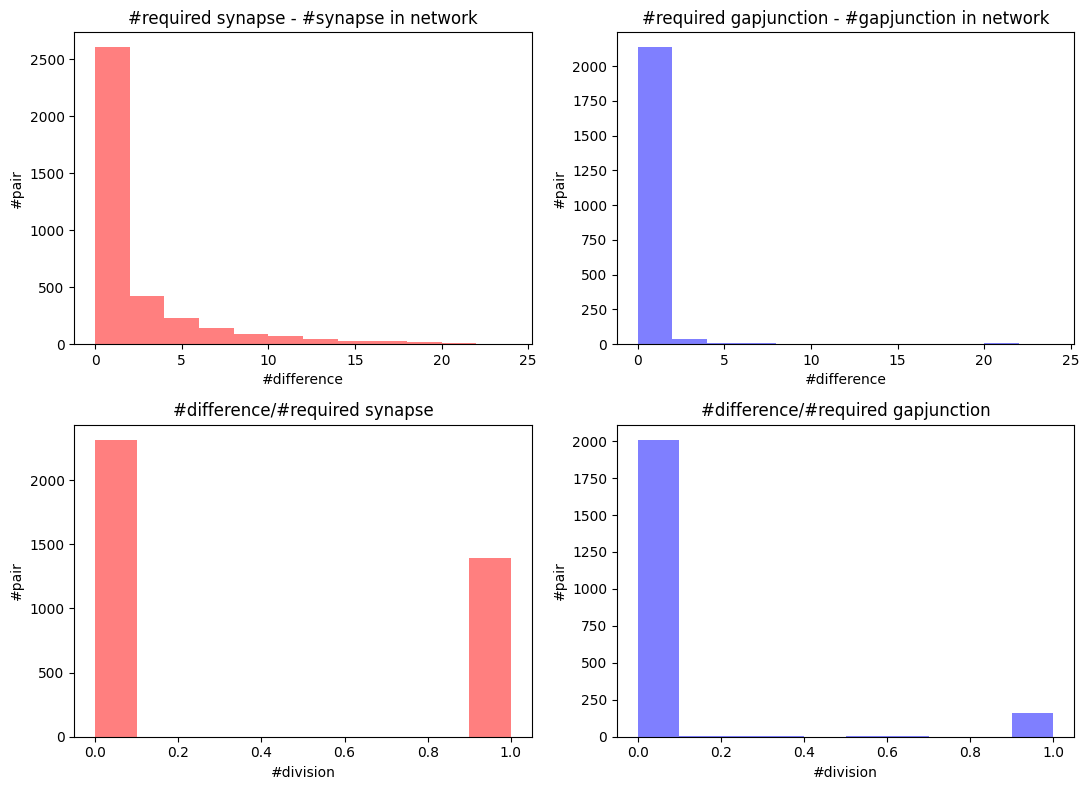

In [54]:
simplify_connection = False
dir_info = config['dir_info']
cnt_info = config['cnt_info']
syn_matrix, _, _ = func.read_excel(file_name=path.join("..", dir_info['adj_matrix_dir']), sheet_name=dir_info['synapse_sheet'])
gj_matrix, _, _ = func.read_excel(file_name=path.join("..", dir_info['adj_matrix_dir']), sheet_name=dir_info['gap_junction_sheet'])
gj_diff_num = []
syn_diff_num = []
gj_div_num = []
syn_div_num = []
for cell_0 in circuit.cells:
    for cell_1 in circuit.cells:
        # actual number
        gj_actual_num = 0
        syn_actual_num = 0
        for connection in cell_0.post_connections:
            assert connection.pre_cell == cell_0
            if connection.post_cell == cell_1:
                if connection.category == 'gj':
                    gj_actual_num += 1
                elif connection.category == 'syn':
                    syn_actual_num += 1
        # required number
        gj_req_num = gj_matrix.cell_value(cell_0.index + 1, cell_1.index + 1)
        if len(str(gj_req_num)) != 0:
            gj_req_num = round(cnt_info['gj_a'] * math.tanh(cnt_info['gj_b'] * gj_req_num))
            if gj_req_num == 0 or simplify_connection:
                gj_req_num = 1
        else:
            gj_req_num = 0
        syn_req_num = syn_matrix.cell_value(cell_0.index + 1, cell_1.index + 1)
        if len(str(syn_req_num)) != 0:
            syn_req_num = round(cnt_info['syn_a'] * math.tanh(cnt_info['syn_b'] * syn_req_num))
            if syn_req_num == 0 or simplify_connection:
                syn_req_num = 1
        else:
            syn_req_num = 0
        if gj_req_num != 0:
            gj_diff_num.append(gj_req_num-gj_actual_num)
            gj_div_num.append(gj_diff_num[-1]/gj_req_num)
        if syn_req_num != 0:
            syn_diff_num.append(syn_req_num-syn_actual_num)
            syn_div_num.append(syn_diff_num[-1]/syn_req_num)

plt.figure(figsize=(11,8))
plt.subplot(2,2,1)
counts_s, bins_s = np.histogram(syn_diff_num, bins=np.linspace(0, 24, 13))
plt.hist(syn_diff_num, bins_s, color='r', alpha=0.5, label="synapse")
plt.xlabel("#difference")
plt.ylabel("#pair")
plt.title("#required synapse - #synapse in network")
plt.subplot(2,2,2)
counts_g, bins_g = np.histogram(gj_diff_num, bins=np.linspace(0, 24, 13))
plt.hist(gj_diff_num, bins_g, color='b', alpha=0.5, label="gapjunction")
plt.xlabel("#difference")
plt.ylabel("#pair")
plt.title("#required gapjunction - #gapjunction in network")
plt.subplot(2,2,3)
# counts_s, bins_s = np.histogram(syn_div_num, bins=np.linspace(0, 24, 13))
plt.hist(syn_div_num, color='r', alpha=0.5, label="synapse")
plt.xlabel("#division")
plt.ylabel("#pair")
plt.title("#difference/#required synapse")
plt.subplot(2,2,4)
# counts_g, bins_g = np.histogram(gj_div_num, bins=np.linspace(0, 24, 13))
plt.hist(gj_div_num, color='b', alpha=0.5, label="gapjunction")
plt.xlabel("#division")
plt.ylabel("#pair")
plt.title("#difference/#required gapjunction")
plt.tight_layout()

/home/zhaomengdi/anaconda3/envs/eworm/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
--No graphics will be displayed.


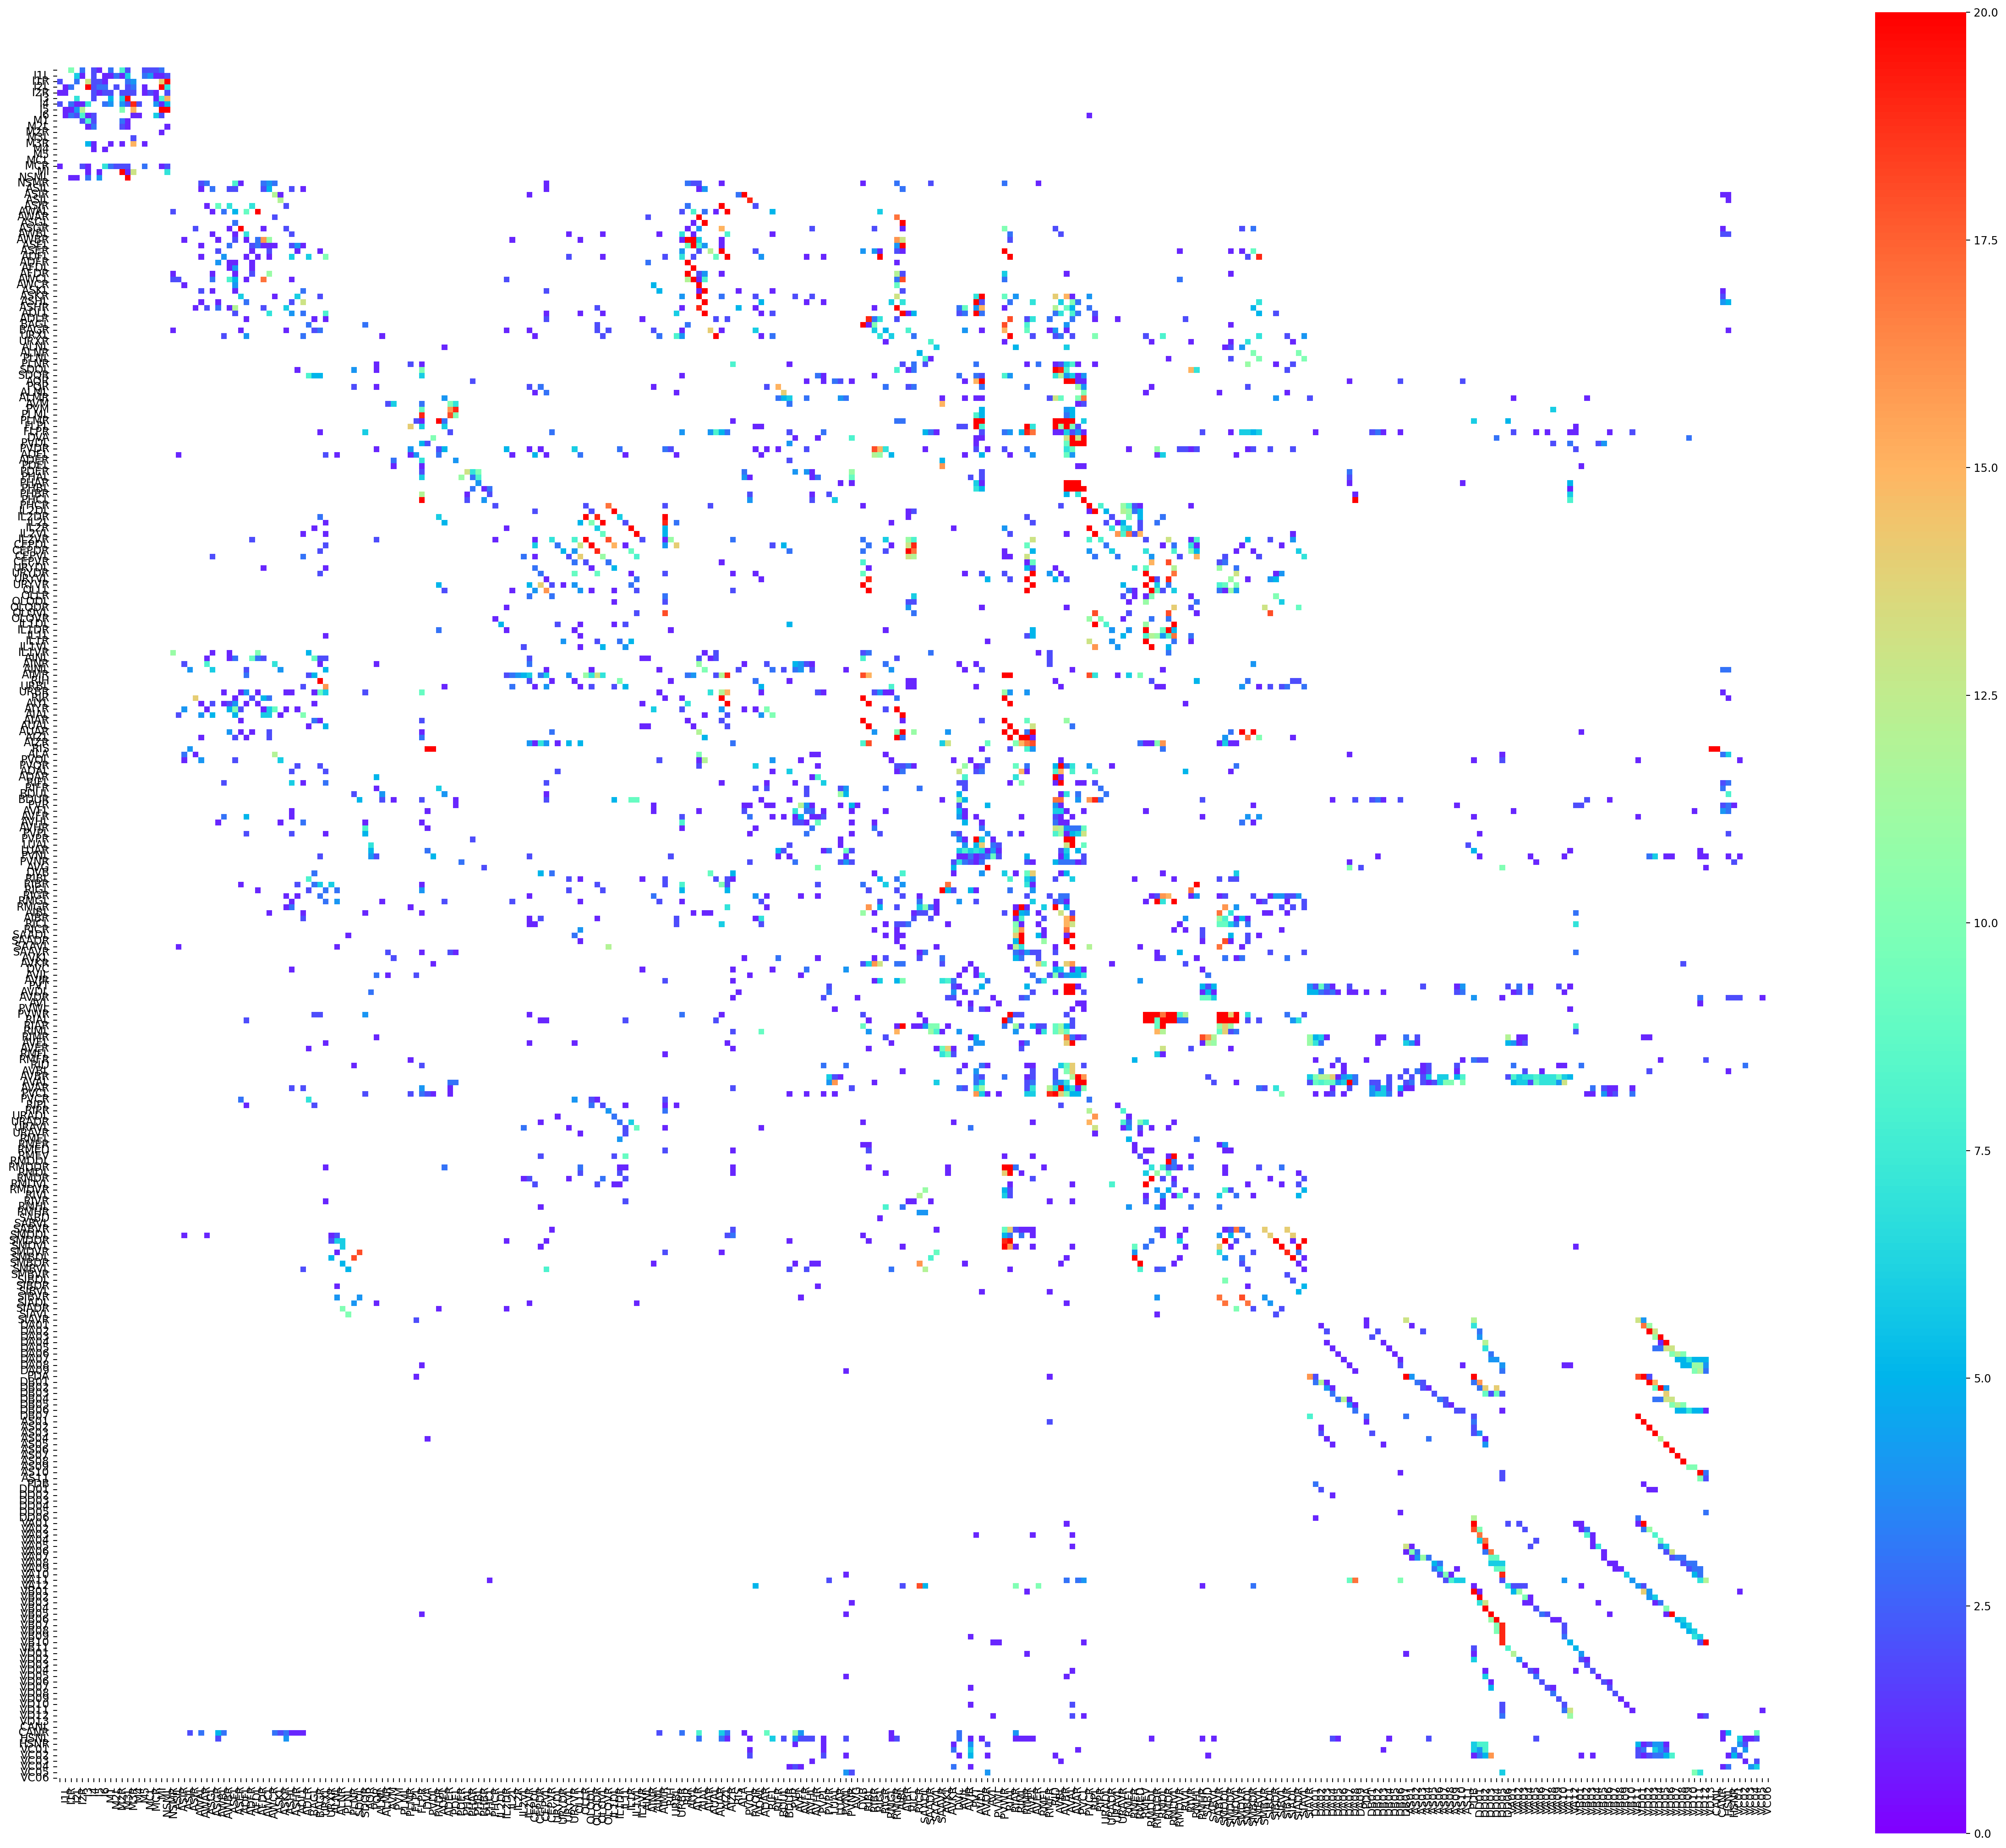

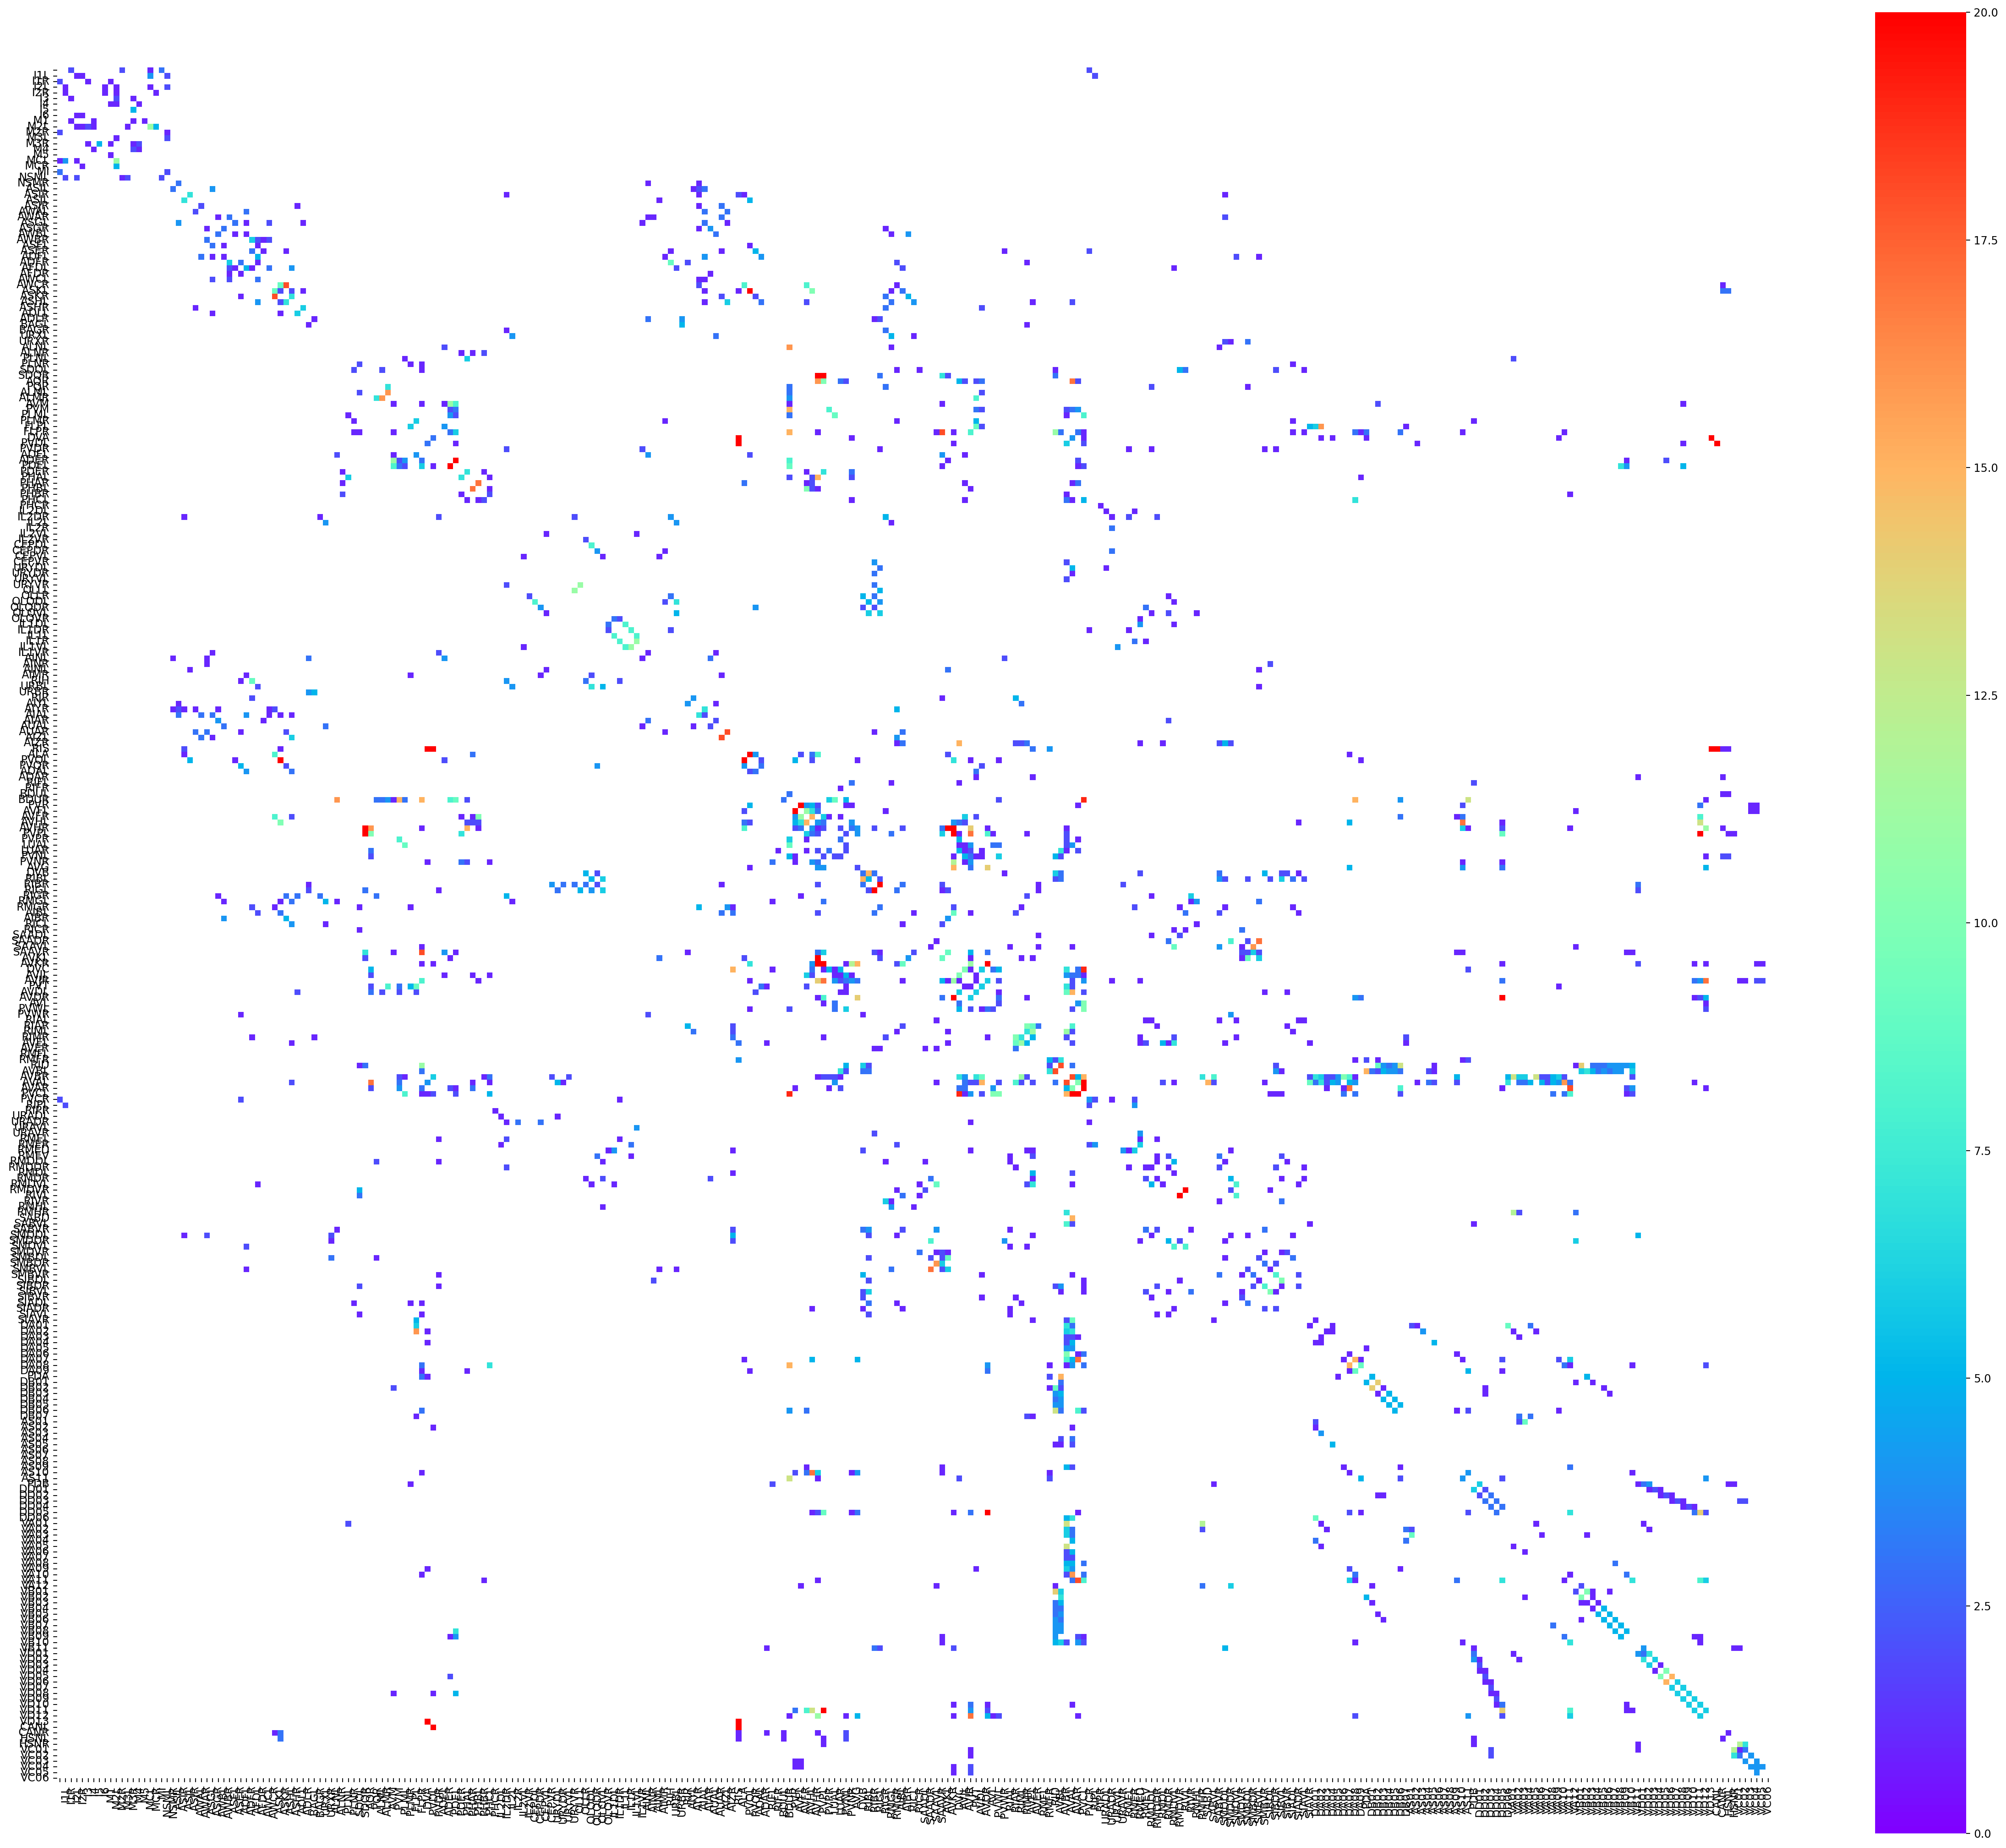

In [1]:
import sys
import pickle
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from eworm.utils import *
import palettable #python颜色库

conn_file_path = "../components/param/connection/SI5-302.xlsx"
sheet_names = ['chemical', 'gapjunction']
for sn in sheet_names:
    matrix, nrow, ncol = func.read_excel(file_name=conn_file_path, sheet_name=sn)
    conn_syn_img = np.zeros((302, 302), dtype=np.float32)
    for i in range(1, nrow):
        for j in range(1, ncol):
            num = matrix.cell_value(i, j)
            if len(str(num)) > 0:
                conn_syn_img[i-1, j-1] = int(num)
    plt.figure(figsize=(35,30), dpi=200)
    sns.heatmap(data=conn_syn_img,
                vmin=np.min(conn_syn_img),
                vmax=20, #np.max(conn_syn_img),
                cmap='rainbow',
                # center=20,
                mask=conn_syn_img<=0,
                # annot=True,  # show number
                yticklabels=matrix.col_values(0),  # 列标签
                xticklabels=matrix.row_values(0),  # 行标签
                square=True,
                )
    plt.savefig(f"connections/{sn}_connection_matrix.png")
    # plt.show()